# Hugging Face Transformers and Pipelines

Hugging Face Transformers is an open-source library that provides a collection of state-of-the-art pre-trained models for natural language processing (NLP). These models can perform a variety of tasks, such as text classification, translation, summarization, and more. The library simplifies the use of these models through "pipelines."

### What are Transformers?
Transformers are a type of model architecture that excels in handling sequential data, such as text. They use a mechanism called "attention" to weigh the importance of different words in a sentence. This allows the model to understand context better and perform various language-related tasks more effectively.

### What are Pipelines?
Pipelines in Hugging Face Transformers provide an easy-to-use interface to perform common NLP tasks. They abstract the complexity of model loading, tokenization (breaking down text into smaller parts), and inference (making predictions) into a simple API.

### Links
- [Website](https://github.com/serengil/deepface)
- [Get started with huggingface](https://huggingface.co/docs/transformers/en/index)
- [GitHub](https://github.com/huggingface/transformers)

# Possible Hugging Face Pipelines

## Text Processing

1. **Text Classification**
   - Sentiment Analysis
   - Topic Classification
   - Spam Detection

2. **Token Classification**
   - Named Entity Recognition (NER)
   - Part of Speech Tagging
   - Chunking

3. **Question Answering**
   - Extractive Question Answering
   - Generative Question Answering

4. **Text Generation**
   - Text Completion
   - Story Generation
   - Dialogue Generation

5. **Translation**
   - Translation from English to French
   - Translation from English to German
   - Translation from English to Spanish

6. **Summarization**
   - Abstractive Summarization
   - Extractive Summarization

7. **Fill-Mask**
   - Masked Language Modeling

8. **Sentence Similarity**
   - Text Similarity
   - Semantic Search

9. **Multiple Choice**
   - Multiple Choice Question Answering

10. **Document Question Answering**
    - Question Answering over Documents (e.g., PDFs)

11. **Text Enhancement**
    - Text Correction
    - Text Simplification

12. **Entity Linking**
    - Linking Named Entities to Knowledge Bases

13. **Coreference Resolution**
    - Identifying References to the Same Entities in Text

14. **Dependency Parsing**
    - Analyzing Grammatical Structure

15. **Language Modeling**
    - Generative Pre-training
    - Next Sentence Prediction

## Speech Processing

1. **Text-to-Speech**
   - Speech Synthesis
   - Voice Cloning

2. **Speech-to-Text**
   - Automatic Speech Recognition (ASR)

3. **Audio Classification**
   - Environmental Sound Classification
   - Music Genre Classification

4. **Speech Enhancement**
   - Noise Reduction
   - Speech Separation

## Image Processing

1. **Image-to-Text**
   - Image Captioning
   - Optical Character Recognition (OCR)

2. **Text-to-Image**
   - Text-to-Image Generation

3. **Image Classification**
   - Object Detection
   - Scene Classification

4. **Image Segmentation**
   - Semantic Segmentation
   - Instance Segmentation

## Multimodal Processing

1. **Text and Image**
   - Multimodal Transformers
   - Vision-Language Models

2. **Visual Question Answering**
   - Answering Questions about Images

## Conversational AI

1. **Conversational**
   - Chatbot
   - Dialogue Systems

## Feature Extraction

1. **Feature Extraction**
   - Text Embeddings
   - Image Embeddings

## Zero-Shot Learning

1. **Zero-Shot Classification**
   - Zero-Shot Text Classification
   - Zero-Shot Image Classification
   - Zero-Shot Audio Classification
   - Zero-Shot Object Detection

## Additional Tasks

1. **Depth Estimation**
2. **Image-to-Image**
3. **Mask Generation**
4. **Table Question Answering**
5. **Video Classification**

These pipelines cover a wide range of tasks and applications in natural language processing, computer vision, and speech processing. You can find more details and examples on how to use these pipelines in the Hugging Face [documentation](https://huggingface.co/docs/transformers/en/index) and [GitHub repository](https://github.com/huggingface/transformers).


In [1]:
# Required Imports
from transformers import pipeline, BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Markdown
import torch


## Sentiment Analysis (Text Classification)
Sentiment analysis determines the emotional tone behind a body of text. It can be used to understand opinions, attitudes, and emotions expressed in written language.

### Example: Sentiment Analysis


In [14]:
def analyze_sentiment(texts):
    sentiment_pipeline = pipeline("text-classification")
    results = sentiment_pipeline(texts)
    data = [{
        "Text": text,
        "Label": result['label'],
        "Score": round(result['score'], 6)
    } for text, result in zip(texts, results)]
    return pd.DataFrame(data)

texts = [
    "I love this product! It's absolutely amazing.",
    "This is the worst experience I've ever had.",
    "I'm feeling pretty neutral about this service.",
    "The movie was fantastic, I enjoyed every moment of it!",
    "I didn't like the food at all.",
    "I love that this took me all night to figure out, (not!)."
]

results_df = analyze_sentiment(texts)
print(results_df)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/Users/mohammed.malloul/Documents/Projects/face-detection/venv/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


                                                Text     Label     Score
0      I love this product! It's absolutely amazing.  POSITIVE  0.999885
1        This is the worst experience I've ever had.  NEGATIVE  0.999768
2     I'm feeling pretty neutral about this service.  NEGATIVE  0.999104
3  The movie was fantastic, I enjoyed every momen...  POSITIVE  0.999887
4                     I didn't like the food at all.  NEGATIVE  0.999072
5  I love that this took me all night to figure o...  POSITIVE  0.990630


## Image Captioning
Image captioning is the task of generating a textual description for a given image. This can be used in various applications, such as assisting visually impaired individuals, organizing and searching image databases, and improving human-computer interaction.

### Example: Image Captioning


In [3]:
# Load the pre-trained BLIP model and processor
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")


/Users/mohammed.malloul/Documents/Projects/face-detection/venv/lib/python3.11/site-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


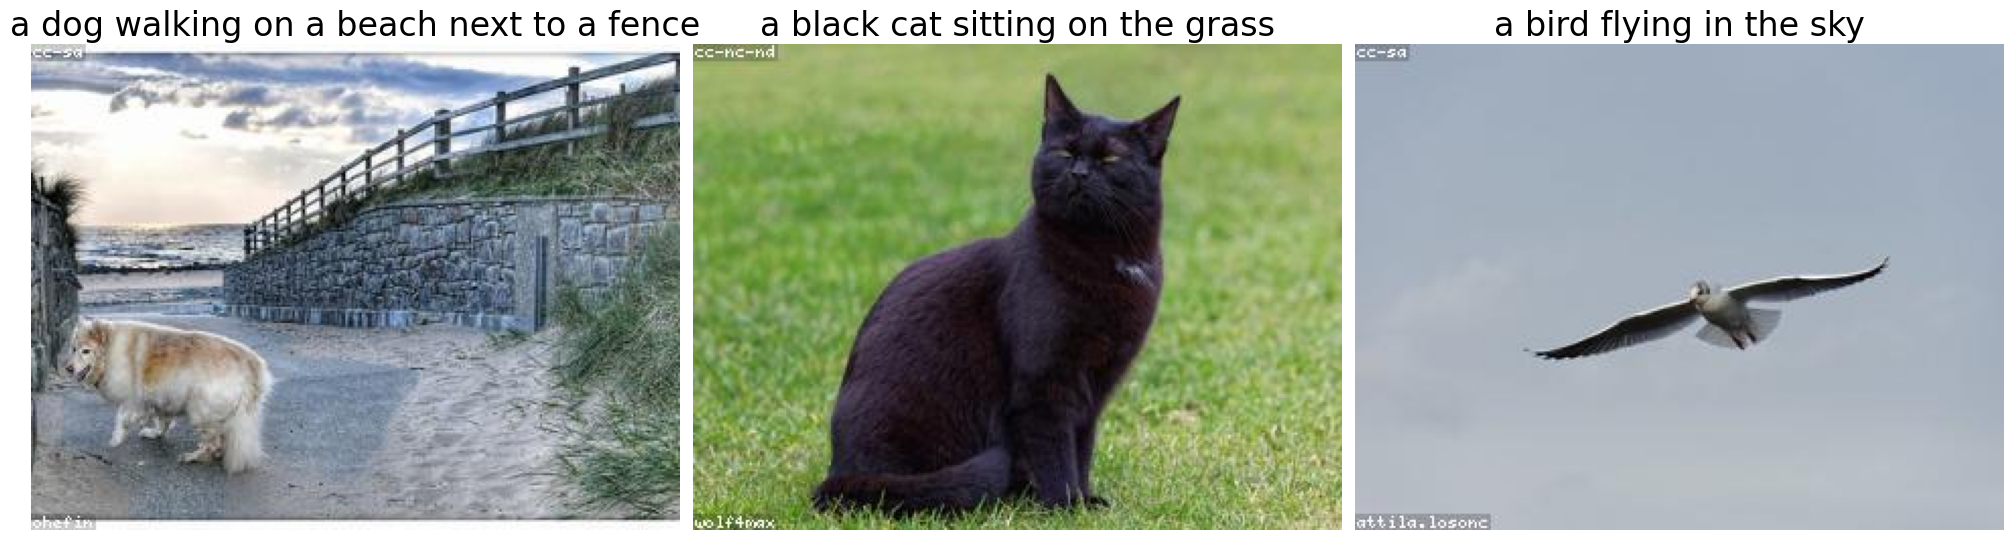

In [15]:
# Function to load an image from a URL
def load_image(url):
    return Image.open(requests.get(url, stream=True).raw)

# Function to generate caption for an image
def generate_caption(image):
    inputs = blip_processor(images=image, return_tensors="pt")
    with torch.no_grad():
        outputs = blip_model.generate(**inputs)
    caption = blip_processor.decode(outputs[0], skip_special_tokens=True)
    return caption

image_urls = [
    "https://loremflickr.com/320/240/dog",
    "https://loremflickr.com/320/240/cat",
    "https://loremflickr.com/320/240/bird"
]

# Display images with captions
fig, axes = plt.subplots(1, len(image_urls), figsize=(20, 20))

for ax, url in zip(axes, image_urls):
    image = load_image(url)
    caption = generate_caption(image)
    ax.imshow(image)
    ax.set_title(caption, fontsize=24)
    ax.axis('off')

plt.tight_layout(pad=1.0)
plt.show()


## Translation
Translation is the process of converting text from one language to another. This is useful in breaking language barriers, enhancing communication, and making content accessible to a global audience.

### Example: Translating English to Dutch


In [5]:
# Load the pre-trained translation model for English to Dutch
translation_pipeline = pipeline("translation_en_to_nl", model="Helsinki-NLP/opus-mt-en-nl")
english_text = "Hello, how are you?"

# Translate the English text to Dutch
translated_text = translation_pipeline(english_text, max_length=512)[0]['translation_text']

print("Translated text (Dutch):", translated_text)


Translated text (Dutch): Hallo, hoe gaat het?


## Summarization
Summarization condenses a long piece of text into a shorter version, preserving the key information and main ideas. This is useful for quickly understanding large documents, articles, and reports.

### Example: Text Summarization


In [6]:
# Initialize the summarizer pipeline
summarizer = pipeline("summarization")

def summarize_text(text, max_length=50, min_length=25):
    summary = summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)[0]['summary_text']
    return summary

# Original text
text = (
    "In a small village nestled between towering mountains, there lived a young girl named Lila. Every morning, "
    "she would climb the tallest hill to watch the sunrise, its golden rays painting the sky in hues of pink and orange. "
    "One day, while on her usual trek, Lila discovered a hidden cave. Inside, she found ancient drawings depicting a time "
    "when dragons roamed the land. Fascinated, she visited the cave daily, feeling a strange connection to the past. "
    "The villagers noticed a change in Lila; she seemed wiser, more serene. Little did they know, the cave held secrets "
    "that only Lila could unlock."
)

# Summarize the text
summary = summarize_text(text)

# Display the original text and the summary in a presentable format
display(Markdown("**Original Text:**\n\n" + text))
display(Markdown("**Summary:**\n\n" + summary))


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/Users/mohammed.malloul/Documents/Projects/face-detection/venv/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


**Original Text:**

In a small village nestled between towering mountains, there lived a young girl named Lila. Every morning, she would climb the tallest hill to watch the sunrise, its golden rays painting the sky in hues of pink and orange. One day, while on her usual trek, Lila discovered a hidden cave. Inside, she found ancient drawings depicting a time when dragons roamed the land. Fascinated, she visited the cave daily, feeling a strange connection to the past. The villagers noticed a change in Lila; she seemed wiser, more serene. Little did they know, the cave held secrets that only Lila could unlock.

**Summary:**

 A young girl named Lila discovered a hidden cave in a small village . Inside, she found ancient drawings depicting a time when dragons roamed the land . Fascinated, she visited the cave daily, feeling a strange connection to the past

## Named Entity Recognition (NER) with BERT
NER identifies entities like names, dates, and locations within text. This is useful for extracting structured information from unstructured text, such as articles, documents, and social media posts.

### Example: Named Entity Recognition

**Explanation of NER Types:**
- **PER:** Person - Individual people or names of people.
- **ORG:** Organization - Companies, agencies, institutions, etc.
- **LOC:** Location - Geographical locations, e.g., cities, countries.
- **MISC:** Miscellaneous - Other entities that do not fall into the above categories.
- **DATE:** Date - Absolute or relative dates or periods.


In [7]:
ner_pipeline = pipeline('ner', model='dbmdz/bert-large-cased-finetuned-conll03-english', aggregation_strategy="simple")


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
def perform_ner(text):
    entities = ner_pipeline(text)
    data = [{
        "Entity": entity['word'],
        "Type": entity['entity_group'],
        "Score": round(entity['score'], 6)
    } for entity in entities]
    return pd.DataFrame(data)

text = """
Elon Musk is the CEO of SpaceX and Tesla. He was born in Pretoria, South Africa, and now resides in the United States. 
On July 20, 2021, Jeff Bezos flew to space on Blue Origin's New Shepard rocket.
"""

entities_df = perform_ner(text)
print(entities_df)


          Entity  Type     Score
0      Elon Musk   PER  0.999481
1         SpaceX   ORG  0.999013
2          Tesla   ORG  0.996849
3       Pretoria   LOC  0.999161
4   South Africa   LOC  0.999657
5  United States   LOC  0.999647
6     Jeff Bezos   PER  0.986516
7    Blue Origin   ORG  0.994395
8    New Shepard  MISC  0.899589


## Text-to-Speech
Text-to-Speech (TTS) involves converting text into spoken words. This can be used for creating voice assistants, audiobooks, and more.

### Example: Text-to-Speech



In [9]:
from transformers import pipeline
import soundfile as sf
from IPython.display import Audio

# Initialize the text-to-speech pipeline
text_to_speech = pipeline("text-to-speech", model="suno/bark-small")


/Users/mohammed.malloul/Documents/Projects/face-detection/venv/lib/python3.11/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
/Users/mohammed.malloul/Documents/Projects/face-detection/venv/lib/python3.11/site-packages/transformers/models/encodec/modeling_encodec.py:120: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)


In [10]:
def synthesize_speech(text):
    speech_output = text_to_speech(text)
    # Extract the audio array and sample rate
    audio_array = speech_output['audio'].flatten()
    sample_rate = speech_output['sampling_rate']
    return audio_array, sample_rate

text = "Hello, how can I assist you today?"

audio_array, sample_rate = synthesize_speech(text)

# Save the speech to a file
sf.write("output.wav", audio_array, samplerate=sample_rate)

# Play the audio file
Audio("output.wav")


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


## Document Question Answering
Document question answering involves answering questions based on a given document. This is useful for tasks like document retrieval and information extraction.

### Example: Document Question Answering


In [11]:
from transformers import pipeline

# Initialize the question answering pipeline
qa_pipeline = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")



In [17]:

# Expanded example document
document = (
    "Hugging Face is an AI company that develops natural language processing (NLP) technologies. "
    "It is known for its open-source library Transformers, which provides a collection of state-of-the-art pre-trained models. "
    "The company was founded in 2016 by Clement Delangue, Julien Chaumond, and Thomas Wolf. "
    "Hugging Face aims to democratize AI and make it accessible to everyone. "
    "Their Transformers library includes models for tasks such as text classification, question answering, and text generation. "
    "In addition to developing software, Hugging Face also provides a platform for sharing and collaborating on machine learning models."
)

# Example questions
questions = [
    "What does Hugging Face develop?",
    "Who founded Hugging Face?",
    "When was Hugging Face founded?",
    "What is the goal of Hugging Face?",
    "What tasks can be performed with the Transformers library?",
    "What additional services does Hugging Face provide?"
]

# Get the answers
answers = [qa_pipeline(question=question, context=document)['answer'] for question in questions]

# Print the questions and corresponding answers
for question, answer in zip(questions, answers):
    print(f"Question: {question}\nAnswer: {answer}\n")

Question: What does Hugging Face develop?
Answer: natural language processing (NLP) technologies

Question: Who founded Hugging Face?
Answer: Clement Delangue, Julien Chaumond, and Thomas Wolf

Question: When was Hugging Face founded?
Answer: 2016

Question: What is the goal of Hugging Face?
Answer: to democratize AI and make it accessible to everyone

Question: What tasks can be performed with the Transformers library?
Answer: text classification, question answering, and text generation

Question: What additional services does Hugging Face provide?
Answer: sharing and collaborating on machine learning models

